In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

### Load Data

In [2]:
df = pd.read_csv('./ttest_noncontentcontrol.csv')

In [3]:
X = df['cosDist'].to_numpy().copy()
y = df['delta_result'].to_numpy().copy()
y[y == 0] = -1

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [5]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X.shape

(3784,)

In [11]:
y.shape

(3784,)

In [16]:
pos = X[y==1]
neg = X[y==-1]

In [43]:
pos_bin1 = pos[pos<0.85]
neg_bin1 = neg[neg<0.85]

pos_bin2 = pos[(pos>0.85) & (pos!=1)]
neg_bin2 = neg[(neg>0.85) & (neg!=1)]

pos_bin3 = pos[pos==1]
neg_bin3 = neg[neg==1]

## T-test

In [51]:
import statsmodels.api as sm
print("Statsmodel T-Test Results")
print(sm.stats.ttest_ind(pos, neg, usevar='unequal'))

from scipy import stats
print("Scipy T-Test Results")
print(stats.ttest_ind(pos, neg, equal_var=False))

Statsmodel T-Test Results
(1.4164958081484489, 0.15683486743503205, 1523.1486466100716)
Scipy T-Test Results
Ttest_indResult(statistic=1.4164958081484489, pvalue=0.15683486743503205)


In [47]:
print("Statsmodel T-Test Results")
print(sm.stats.ttest_ind(pos_bin1, neg_bin1, usevar='unequal'))

Statsmodel T-Test Results
(0.33263590734349574, 0.7395942174585488, 376.5963522754103)


In [49]:
print("Statsmodel T-Test Results")
print(sm.stats.ttest_ind(pos_bin2, neg_bin2, usevar='unequal'))

Statsmodel T-Test Results
(-0.3709615521975772, 0.7109190260958722, 310.6343311328505)


In [50]:
print("Statsmodel T-Test Results")
print(sm.stats.ttest_ind(pos_bin3, neg_bin3, usevar='unequal'))

Statsmodel T-Test Results
(nan, nan, nan)


/anaconda3/envs/data558/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:849: RuntimeWarning: invalid value encountered in double_scalars
  z1 = (sem1 / semsum)**2 / (d1.nobs - 1)
/anaconda3/envs/data558/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:850: RuntimeWarning: invalid value encountered in double_scalars
  z2 = (sem2 / semsum)**2 / (d2.nobs - 1)
/anaconda3/envs/data558/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:616: RuntimeWarning: invalid value encountered in double_scalars
  tstat = (value1 - value2 - diff) / std_diff


### Descriptive Statistics

In [9]:
df

,commenter,op,comment_id,post_id,delta_result,cosDist
0,Fakename998,PD049,"efzlpas,efzlf8k",aoatow,0,1.000000
1,Maxfunky,Bman409,egbtbzx,apwo5y,0,0.653056
2,coryrenton,deeefoo,egz697a,at6x7i,0,1.000000
3,SplendidTit,phil127,"eg4vcbd,eg4w0pd,eg4v26n,eg4wojr",ap0axf,0,0.799687
4,ejohnson4,stenlis,efr7lpl,an2ofa,0,0.815100
5,AGSessions,IdiotIII,"efv0r95,efv1u7l,efuzpvf",anp1z8,0,1.000000
6,smellslikebadussy,Zerefihr,"efo1nxs,efo2oxh,efnzo01",amr93d,0,1.000000
7,ThatGuysNewAccount,GreyWormy,"eg32ofa,eg2o68i",ao9k3w,0,0.808654
8,pillbinge,hmsdexter,egvzsh8,asptka,0,0.890891
9,OhhBenjamin,knortfoxx,eg5pk82,ap2pe7,0,0.795876


In [10]:
df.groupby(['delta_result']).agg({'delta_result':'count','cosDist':'mean'})

,delta_result,cosDist
delta_result,,
0,2933,0.929655
1,851,0.934957


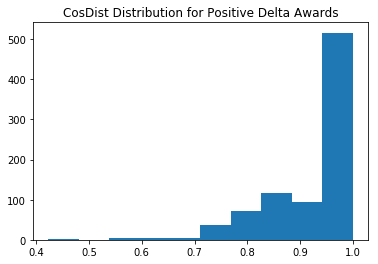

In [11]:
plt.hist(df[df['delta_result'] == 1]['cosDist'], bins=10)
plt.title('CosDist Distribution for Positive Delta Awards');

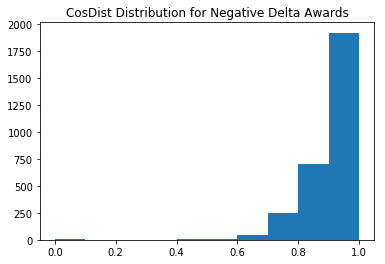

In [12]:
plt.hist(df[df['delta_result'] == 0]['cosDist'], bins=10)
plt.title('CosDist Distribution for Negative Delta Awards');

### Logistic Regression Model

Predict: Delta awarded or not

Features: cos-dist, linguistic features

In [25]:
from sklearn.linear_model import LogisticRegressionCV
delta_clf = LogisticRegressionCV(Cs=10, penalty='l2', fit_intercept=False, cv=5, class_weight='balanced')
delta_clf.fit(X_train, y_train)
delta_clf.score(X_test, y_test)

0.4385733157199472

In [26]:
from sklearn.metrics import classification_report
y_pred = delta_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.78      0.40      0.53       594
           1       0.21      0.60      0.31       163

   micro avg       0.44      0.44      0.44       757
   macro avg       0.50      0.50      0.42       757
weighted avg       0.66      0.44      0.48       757



In [27]:
from sklearn.metrics import roc_auc_score
y_pred = delta_clf.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.4953574600813865
